In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from scipy.optimize import curve_fit


import math
from skimage import color
from skimage.io import imread
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
import skimage.draw as sdraw
from skimage.util import img_as_ubyte

from skimage.morphology import binary_closing, disk, erosion, dilation
import scipy.ndimage as nd
import skimage.draw as sdraw

from matplotlib import colors
from skimage.measure import label, regionprops

In [2]:
LastCODE = 63216740
specialCODE = '0003'
fa = 20
tr = 6
TR = tr*1e-3
TE = TR/2 
echonum = 12
DICOMFILENAME = []
for i in range (0,echonum):
    LAST = str(LastCODE+18*i)
    if(i<9):
         DICOM1 = 'DICOM/GOLDSTANDARD_'+str(tr)+'msTR_'+str(fa)+'FA/NPERIODIC_140423_1.MR.'+specialCODE+'.000'+str(int(i+1))+'.2023.04.14.15.23.33.996403.'+LAST+'.IMA'
    else:
        DICOM1 = 'DICOM/GOLDSTANDARD_'+str(tr)+'msTR_'+str(fa)+'FA/NPERIODIC_140423_1.MR.'+specialCODE+'.00'+str(int(i+1))+'.2023.04.14.15.23.33.996403.'+LAST+'.IMA'
    DICOMFILENAME.append(DICOM1)
    print(DICOM1)

DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0001.2023.04.14.15.23.33.996403.63216740.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0002.2023.04.14.15.23.33.996403.63216758.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0003.2023.04.14.15.23.33.996403.63216776.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0004.2023.04.14.15.23.33.996403.63216794.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0005.2023.04.14.15.23.33.996403.63216812.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0006.2023.04.14.15.23.33.996403.63216830.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0007.2023.04.14.15.23.33.996403.63216848.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0008.2023.04.14.15.23.33.996403.63216866.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0009.2023.04.14.15.23.33.996403.63216884.IMA
DICOM/GOLDSTANDARD_6msTR_20FA/NPERIODIC_140423_1.MR.0003.0010.2023.04.14.15.23.33.

In [13]:
#LOAD DICOM DATA
GOLDSTD_DATA = np.asarray(np.zeros((1,256,256)), dtype = float)
TIME = np.asarray([], dtype = float)
for i in range (0,echonum):
    filepath = DICOMFILENAME[i]
    img = pydicom.read_file(filepath)
    GOLDSTD_DATA = np.append(GOLDSTD_DATA, img.pixel_array.reshape((1,256,256)), axis = 0)
    #Corresponding "time" on exponential fit for each array layer
    TIME = np.append(TIME, TE + TR*i)
GOLDSTD_DATA =  np.delete(GOLDSTD_DATA,0,0)
#pixel array for different TR stored in GOLDSTD_DATA



# Method 1

In [93]:
fa = 40
tr = 6
TR = tr*1e-3
TE = TR/2 
echonum = 12
DICOMFILENAME = []
for i in range (0,echonum):
    DICOM1 = 'recon/multiecho_FLASH/tr'+str(tr)+'_fa'+str(fa)+'_echo'+str(i+1)+'.dcm'

    DICOMFILENAME.append(DICOM1)

#LOAD DICOM DATA
GOLDSTD_DATA = np.asarray(np.zeros((1,256,256)), dtype = float)
TIME = np.asarray([], dtype = float)
for i in range (0,echonum):
    filepath = DICOMFILENAME[i]
    img = pydicom.read_file(filepath)
    GOLDSTD_DATA = np.append(GOLDSTD_DATA, img.pixel_array.reshape((1,256,256)), axis = 0)
    #Corresponding "time" on exponential fit for each array layer
    TIME = np.append(TIME, TE + TR*i)
GOLDSTD_DATA =  np.delete(GOLDSTD_DATA,0,0)
#pixel array for different TR stored in GOLDSTD_DATA



In [94]:
import matplotlib.image
array = GOLDSTD_DATA[1,:,:]
matplotlib.image.imsave('MASKGenerationBase.jpg', array)

In [107]:
import cv2
import numpy as np

MASK_3_img = np.zeros((256,256,3), np.uint8)

# Read image.
img = cv2.imread('MASKGenerationBase.jpg', cv2.IMREAD_COLOR)
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (1, 1))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2.imshow("Detected Circle", img)
        cv2.waitKey(0)


In [113]:
np.shape(detected_circles)

(1, 11, 3)

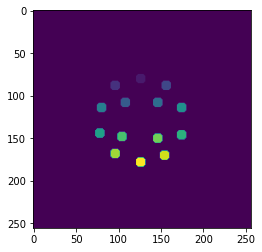

In [117]:
MASK_3 = np.asarray(np.zeros((256,256)), dtype = float)
detected_circles
for i in range(0,np.shape(detected_circles)[1]):
    circy, circx = sdraw.disk((detected_circles[0,i,1], detected_circles[0,i,0]), 6)
    #color = colors.pop(0)
    MASK_3[circy, circx] = 1
    #colors.append(color)

circy, circx = sdraw.disk((144,78), 6)
    #color = colors.pop(0)
MASK_3[circy, circx] = 1
circy, circx = sdraw.disk((114,80), 6)
MASK_3[circy, circx] = 1
circy, circx = sdraw.disk((108,108), 6)
MASK_3[circy, circx] = 1

MASK_3 = label(MASK_3)
plt.imshow((np.ones((256,256))-MASK_3)*array)
plt.imshow(MASK_3)
np.save("Figure/MASKLABEL_4.npy", MASK_3)

In [105]:
detected_circles

array([[[ 80, 114,   7],
        [ 78, 144,  10],
        [ 98, 168,   7],
        [146, 150,   7],
        [108, 108,  10],
        [126,  80,   8],
        [ 96,  88,   8],
        [174, 146,   8],
        [156,  90,   8],
        [106, 148,   7],
        [180,  76,   7],
        [148, 110,   8]]], dtype=uint16)

# Method 2

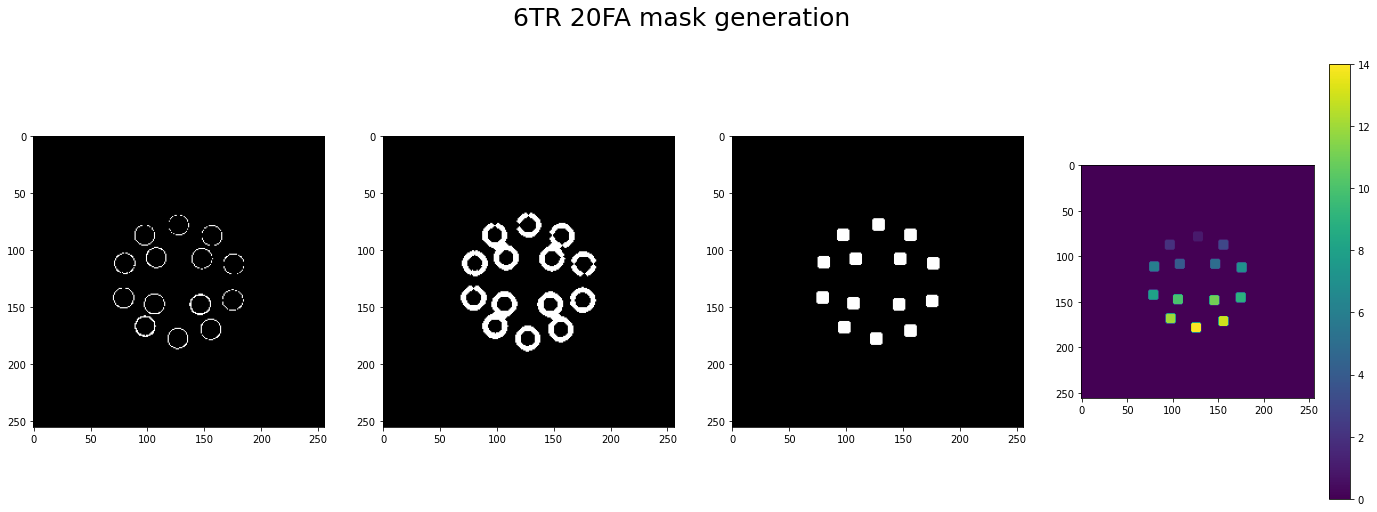

In [24]:
def multi_erosion(image, kernel, iterations):
    for i in range(iterations):
        image = erosion(image, kernel)
    return image

def multi_dilation(image, kernel, iterations):
    for i in range(iterations):
        image = dilation(image, kernel)
    return image

cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]])

#MASK generate base on the first image
image = GOLDSTD_DATA[1,:,:]
#Final Mask
MASK = np.zeros((256,256))
fig=plt.figure(figsize=(24, 8))


#STEP 1 Remove quare at middle and other things in the background 
I_pre = np.asarray(np.zeros((256,256)), dtype = float)
for x in range (0,256):
    for y in range (0,256):
        if ((image[x,y]*image[x,y]*image[x,y])<200000):
            I_pre[x,y] = 1
        if ((pow(x-125,2)+pow(y-125,2))>4410):
            I_pre[x,y] = 0
        if (x>117 and x<136 and y>90 and y<155):
            I_pre[x,y] = 0
fig.add_subplot(1,4,1)
plt.imshow(I_pre, cmap='gray')
#MASK generate base on the first image
# image = GOLDSTD_DATA[0,:,:]
# #Final Mask
# MASK = np.zeros((256,256))
# fig=plt.figure(figsize=(24, 8))


# #STEP 1 Remove quare at middle and other things in the background 
# I_pre = np.asarray(np.zeros((256,256)), dtype = float)
# for x in range (0,256):
#     for y in range (0,256):
#         if (image[x,y]<300000000):
#             I_pre[x,y] = 1
#         if ((pow(x-125,2)+pow(y-125,2))>4410):
#             I_pre[x,y] = 0
#         if (x>117 and x<140 and y>90 and y<156):
#             I_pre[x,y] = 0
# fig.add_subplot(1,3,1)
# plt.imshow(I_pre, cmap='gray')



#STEP 2 Closing the circles 
strel = disk(1)
I_closed = binary_closing(I_pre, strel)
I_closed = multi_dilation(I_closed, cross, 4)
I_closed = multi_erosion(I_closed, cross, 2)

# Closed image
fig.add_subplot(1,4,2)
plt.imshow(I_closed, cmap='gray')

#STEP 3 Draw circle on the final MASK
# skimage version 0.14.0
IMAGE = I_closed

BEST_COUNT = 14              # how many circles to draw
MIN_RADIUS = 7              # min radius should be bigger than noise
MAX_RADIUS = 20             # max radius of circles to be detected (in pixels)
LARGER_THRESH = 1.2         # circle is considered significantly larger than another one if its radius is at least so much bigger
OVERLAP_THRESH = 0.1        # circles are considered overlapping if this part of the smaller circle is overlapping

def circle_overlap_percent(centers_distance, radius1, radius2):
    '''
    Calculating the percentage area overlap between circles
    See Gist for comments:
        https://gist.github.com/amakukha/5019bfd4694304d85c617df0ca123854
    '''
    R, r = max(radius1, radius2), min(radius1, radius2)
    if centers_distance >= R + r:
        return 0.0
    elif R >= centers_distance + r:
        return 1.0
    R2, r2 = R**2, r**2
    x1 = (centers_distance**2 - R2 + r2 )/(2*centers_distance)
    x2 = abs(centers_distance - x1)
    y = math.sqrt(R2 - x1**2)
    a1 = R2 * math.atan2(y, x1) - x1*y
    if x1 <= centers_distance:
        a2 = r2 * math.atan2(y, x2) - x2*y
    else:
        a2 = math.pi * r2 - a2
    overlap_area = a1 + a2
    return overlap_area / (math.pi * r2)

def circle_overlap(c1, c2):
    d = math.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2)
    return circle_overlap_percent(d, c1[2], c2[2])

def inner_circle(cs, c, thresh):
    '''Is circle `c` is "inside" one of the `cs` circles?'''
    for dc in cs:
        # if new circle is larger than existing -> it's not inside
        if c[2] > dc[2]*LARGER_THRESH: continue
        # if new circle is smaller than existing one...
        if circle_overlap(dc, c)>thresh:
            # ...and there is a significant overlap -> it's inner circle
            return True
    return False

# Load picture and detect edges
image = IMAGE
edges = canny(image, sigma=3)

# Detect circles of specific radii
hough_radii = np.arange(MIN_RADIUS, MAX_RADIUS, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent circles (in order from best to worst)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii)

# Determine BEST_COUNT circles to be drawn
drawn_circles = []
for crcl in zip(cy, cx, radii):
    # Do not draw circles if they are mostly inside better fitting ones
    if not inner_circle(drawn_circles, crcl, OVERLAP_THRESH):
        # A good circle found: exclude smaller circles it covers
        i = 0
        while i<len(drawn_circles):
            if circle_overlap(crcl, drawn_circles[i]) > OVERLAP_THRESH:
                t = drawn_circles.pop(i)
            else:
                i += 1
        # Remember the new circle
        drawn_circles.append(crcl)
    # Stop after have found more circles than needed
    if len(drawn_circles)>BEST_COUNT:
        break

drawn_circles = drawn_circles[:BEST_COUNT]

# Actually draw circles
colors  = [(250, 0, 0), (0, 250, 0), (0, 0, 250)]
colors += [(200, 200, 0), (0, 200, 200), (200, 0, 200)]
#image = color.gray2rgb(image)
for center_y, center_x, radius in drawn_circles:
    circy, circx = sdraw.disk((center_y, center_x), radius)
    #color = colors.pop(0)
    MASK[circy, circx] = 1
    #colors.append(color)

MASK = multi_erosion(MASK, cross, 5)
LABELMASK = label(MASK)
fig.add_subplot(1,4,3)
plt.imshow(MASK, cmap='gray')
fig.suptitle(str(tr)+"TR "+str(fa)+"FA mask generation", fontsize = 25)

fig.add_subplot(1,4,4)
plt.imshow(LABELMASK)
fig.suptitle(str(tr)+"TR "+str(fa)+"FA mask generation", fontsize = 25)
plt.colorbar()

# plt.savefig("Figure/GOLDstandardT2Star/MASKgeneration_v2.jpg")
# np.save("Figure/GOLDstandardT2Star/MASKLABEL_2.npy", LABELMASK)